In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np


# Load data sheet
df = pd.read_csv('../data/results/hotel_booking_cancellation_prediction_one_hot_deposit.csv')


In [28]:
# Convert the months in 'arrival_date' to numerical values
df['arrival_date_month'] = pd.to_datetime(df['arrival_date']).dt.month

# Define the X 
X = df.drop(columns=['is_canceled', 'arrival_date', 'stays_in_weeks_nights',
                      'children', 'babies'])

# Target variable
y = df['is_canceled']


# Split the date 80% train/ 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


# Regularization param
gamma_range = np.arange(0, 5.1, 0.1).tolist()
max_delta_step_range = np.arange(1, 5, 1).tolist()

reg_alpha_range = np.arange(0.1, 5, 0.1).tolist() # L1 regularization
reg_lambda_range = np.arange(0.1, 5, 0.1).tolist() # L2 regularization

# Tree structure param
max_depth_range = np.arange(0, 10, 1).tolist()
min_child_weight_range = np.arange(1, 10.1, 0.1).tolist()

# Sample param
subsample_range = np.arange(0.1, 1.1, 0.1)
colsample_bytree_range = np.arange(0.1, 1.1, 0.1)

# Learning param
learning_rate_range = np.arange(0.01, 1, 0.01)
n_estimators_range = [100, 200, 300]
    

# Set the params for GridSearch
param_grid = {
    'gamma': gamma_range,
    'max_delta_step': max_delta_step_range,

    'reg_alpha': reg_alpha_range,              # L1 regularization
    'reg_lambda': reg_lambda_range,            # L2 regularization

    'max_depth': max_depth_range,                
    'min_child_weight': min_child_weight_range,

    'subsample': subsample_range,         # Fraction of samples used per tree
    'colsample_bytree': colsample_bytree_range, # Fraction of features used per tree


    'learning_rate': learning_rate_range,          # Shrinkage factor
    'n_estimators': n_estimators_range             # Number of trees

}


# Phase 1
param_grid_p1 = {
    'max_depth': max_depth_range,                
    'min_child_weight': min_child_weight_range
}

# Phase 2
param_grid_p2 = {
    'gamma': gamma_range,             
    'subsample': subsample_range, 
    'colsample_bytree': colsample_bytree_range
}


# Phase 3
param_grid_p3 = {
    'learning_rate': learning_rate_range,
    'n_estimators': n_estimators_range    
}

# Setup the model with the base param
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_jobs=-1,
    random_state=42
)







Fitting 5 folds for each of 910 candidates, totalling 4550 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'max_depth': [0, 1, ...], 'min_child_weight': [1.0, 1.1, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


Phase 1

In [ ]:
# Set the GridSearch 1

# Setup the model with the base param
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_jobs=-1,
    random_state=42
)

grid_search_1 = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_p1,
    cv=5,
    scoring='accuracy',  # Poți schimba în 'roc_auc' pentru AUC
    verbose=2,
    refit=True,
    n_jobs=-1
)

# Fit the GridSearch
grid_search_1.fit(X_train, y_train)

Phase 2

In [54]:
# Set the GridSearch 2

# Setup the model with the base param
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_jobs=-1,
    random_state=42,
    max_depth=3,
    min_child_weight=1.6
)

grid_search_2 = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_p2,
    cv=5,
    scoring='accuracy',  # Poți schimba în 'roc_auc' pentru AUC
    verbose=2,
    refit=True,
    n_jobs=-1,

)

# Fit the GridSearch
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 5100 candidates, totalling 25500 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': array([0.1, 0....8, 0.9, 1. ]), 'gamma': [0.0, 0.1, ...], 'subsample': array([0.1, 0....8, 0.9, 1. ])}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [57]:
# Set the GridSearch 3

# Setup the model with the base param
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_jobs=-1,
    random_state=42,
    max_depth=3,
    min_child_weight=1.6,
    colsample_bytree= 1,
    gamma=0.5,
    subsample=1
)

grid_search_3 = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_p3,
    cv=5,
    scoring='accuracy',  # Poți schimba în 'roc_auc' pentru AUC
    verbose=2,
    refit=True,
    n_jobs=-1
)

# Fit the GridSearch
grid_search_3.fit(X_train, y_train)

Fitting 5 folds for each of 297 candidates, totalling 1485 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': array([0.01, ..., 0.98, 0.99]), 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


Results Phase 1

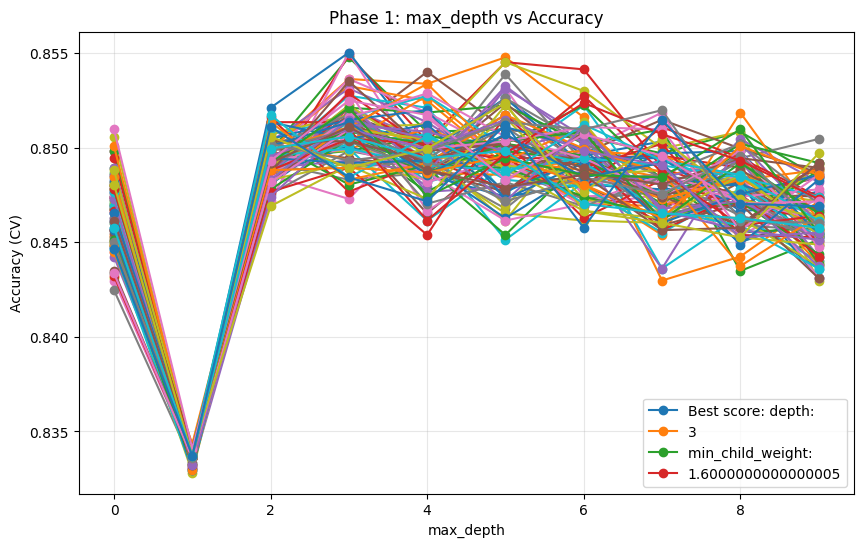

Best Param phase 1: {'max_depth': 3, 'min_child_weight': 1.6000000000000005}
Best Accuracy phase 1: 0.8550214215129286


In [29]:
# Results
results_1 = pd.DataFrame(grid_search_1.cv_results_)
best_params_1 = grid_search_1.best_params_

# Graph for phase 1
plt.figure(figsize=(10, 6))
for weight in param_grid_p1['min_child_weight']:
    mask = results_1['param_min_child_weight'] == weight
    plt.plot(
        results_1['param_max_depth'][mask],
        results_1['mean_test_score'][mask],
        'o-',
        label='_'
    )
best_legend = "Best score: depth: ", best_params_1['max_depth'], "min_child_weight: ", best_params_1['min_child_weight']

plt.title('Phase 1: max_depth vs Accuracy', fontsize=12)
plt.xlabel('max_depth', fontsize=10)
plt.ylabel('Accuracy (CV)', fontsize=10)
plt.legend(best_legend)
plt.grid(alpha=0.3)
plt.show()

print("Best Param phase 1:", best_params_1)
print("Best Accuracy phase 1:", grid_search_1.best_score_)

Results Phase 2

In [56]:
# Results for Phase 2
best_params_2 = grid_search_2.best_params_

print("Best gamma: ", best_params_2['gamma'])
print("Best subsample: ", best_params_2['subsample'])
print("Best colsample_bytree: ", best_params_2['colsample_bytree'])
print("Best accuracy: ", grid_search_2.best_score_)


Best gamma:  0.5
Best subsample:  1.0
Best colsample_bytree:  1.0
Best accuracy:  0.8552748262620347


Results phase 3

In [58]:
# Results for Phase 3
best_params_3 = grid_search_3.best_params_

print("Best learning_rate: ", best_params_3['learning_rate'])
print("Best n_estimators: ", best_params_3['n_estimators'])
print("Best accuracy: ", grid_search_3.best_score_)

Best learning_rate:  0.22
Best n_estimators:  200
Best accuracy:  0.855275148148029


In [60]:
# Save the best param
best_params = {}
best_params.update(best_params_1)
best_params.update(best_params_2)
best_params.update(best_params_3)

with open('best_params_xgboost.txt', 'a') as f:
    f.write("\n\nNew Test: \n")
    f.write("Best params XGBoost: \n") 
    for param, val in best_params.items():
        f.write(f"{param}: {val}\n")

print("Saved successfully")


Saved successfully


In [29]:
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
print("Scale weight: ", scale_pos_weight)


# Create the model
model = XGBClassifier(enable_categorical=True,
                      scale_pos_weight=scale_pos_weight,
                      eval_metric='auc', 
                      random_state=42,
                      max_depth=3,
                      min_child_weight=1.6,
                      colsample_bytree=1,
                      gamma=0.5,
                      subsample=1,
                      learning_rate=0.22,
                      n_estimators=200 
                      )

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Scale weight:  1.6297531687791862
Accuracy: 0.8528665651953323

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1214
           1       0.79      0.85      0.82       757

    accuracy                           0.85      1971
   macro avg       0.84      0.85      0.85      1971
weighted avg       0.86      0.85      0.85      1971



                         Feature  Importance
73            deposit_Non Refund    0.250261
56      market_segment_Online TA    0.130006
20                  room_changed    0.094998
45                   country_PRT    0.066775
14   required_car_parking_spaces    0.048561
70       customer_type_Transient    0.035642
15     total_of_special_requests    0.033591
9         previous_cancellations    0.021890
53         market_segment_Direct    0.020705
55  market_segment_Offline TA/TO    0.017831


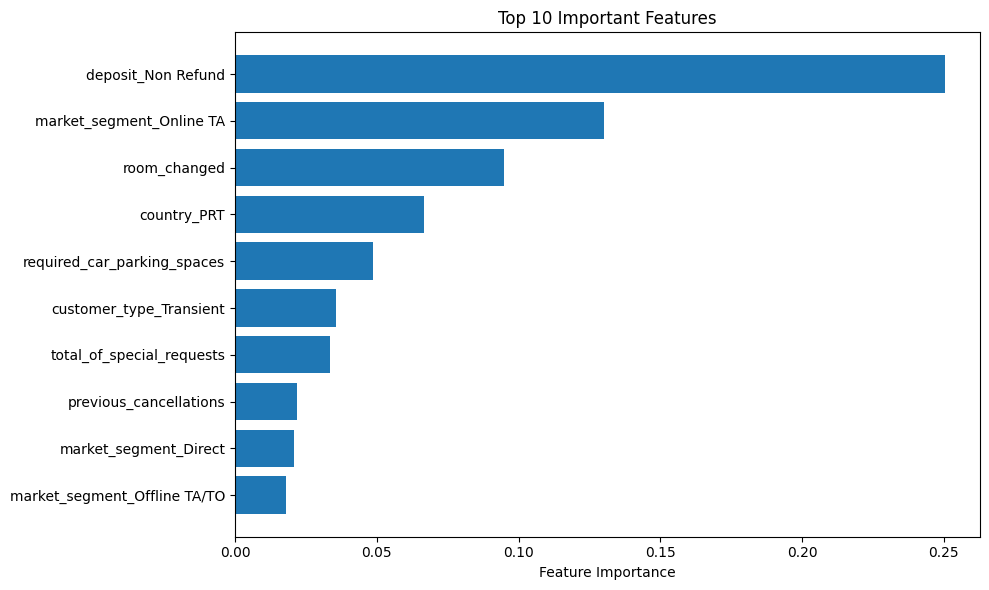

In [26]:
importances = model.feature_importances_
features = X.columns

# Creează un DataFrame pentru sortare
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afișează top 10
print(feature_importance_df.head(10))

# Opțional: Grafic
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
